<a href="https://colab.research.google.com/github/rubyvanrooyen/ARIWS-Cookbook/blob/main/0-Introduction/FT_and_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using FT for Signal Processing#

The Fourier Transform decomposes signals into their respective frequencies. Thus enabling us to
* to find signals is very noisy data and to
* calculate the amplitude and frequency of periodic signals

## The FT of Noise

The FT is defined as the fitting of sinusiodal components to identify signal frequencies.

Why will this work for noise, which is a random signal that cannot be reproduced uniquely?

Lets consider a number of sinusoidal signals that are out of phase, and all with the approximately the same amplitude. By randomly adding these signals we see that we can simulate a noise signal. Since we are adding them randomly, we see that they combined signal changes and that we struggle to reproduce 2 signals that look vaquely similar.

This is why the FT works on noise. Fitting a sequence of period signals will not change the noise, it will simply show that all period have similar probability of being in the signal.

Let's try it:

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import time

Repeat until you find the combination of 9 frequencies that generates a signal that looks like random noise generate 9 random frequencies between 0 and 0.5.

For every run, look at the output and how the combined signal changes.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

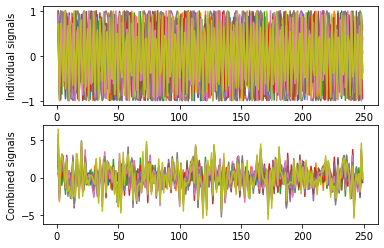

In [2]:
counter = 0
frequencies = []
while 1:
    freq = np.random.randn(1)[0]
    if freq > 0 and freq < 0.5:
        frequencies.append(freq)
        counter += 1
    if counter > 8:
        break

def generate_signal(freq, time):
    return np.sin(2*np.pi*freq*time)

# simulated time series
t = np.arange(1,250)
s = np.zeros(np.size(t))
plt.figure()
plt.clf()
for freq in frequencies:
    time_series = generate_signal(freq, t)
    s = s + time_series
    plt.subplot(2,1,1)
    plt.plot(t, time_series)
    plt.ylabel('Individual signals')
    plt.subplot(2,1,2)
    plt.plot(t,s)
    plt.ylabel('Combined signals')
plt.show()

## Signals and Noise

In [3]:
def ft(y):
    return np.fft.fftshift(np.fft.fft(np.fft.fftshift(y)))

def ftfreqs(N,dt):
    return np.fft.fftshift(np.fft.fftfreq(N,dt))

A periodic signal will repeat at regular intervals and when the FT fits a sinusoid with the correct frequency, this will add together over the signal and that specific frequency bin will contain all the signal power.

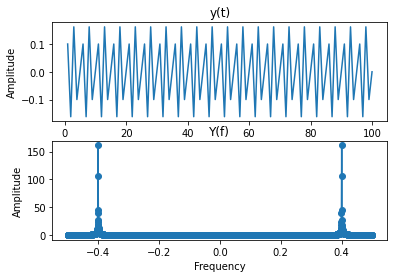

In [4]:
t = np.arange(1,2500)
delta_t = 1.0

# generate a low amplitude low frequency sinusoidal wave (amplitude = 0.17)
signal = 0.17*np.sin(2*np.pi*0.4*t)

# remove DC spike
y=signal-np.mean(signal)
Y = ft(y)                           # Fourier transform
freqs = ftfreqs(len(y),delta_t)
plt.figure()
plt.clf()
plt.subplot(2,1,1)
plt.plot(t[:100],y[:100])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('y(t)')
plt.subplot(2,1,2)
plt.plot(freqs,np.abs(Y),'o-')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Y(f)')
plt.show()

For noise, there is no specific repeating signal, just a bunch of random fitted sinusoids. Thus the power of the noise signal will be distributed over all the fitted frequencies of the FT.

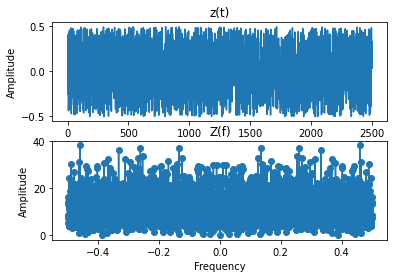

In [5]:
# generate a white noise signal with amplitude = 1
noise = np.random.rand(np.size(t))

# remove DC spike
z=noise-np.mean(noise)
Z = ft(z)                           # Fourier transform
freqs = ftfreqs(len(z),delta_t)
plt.figure()
plt.clf()
plt.subplot(2,1,1)
plt.plot(t,z)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('z(t)')
plt.subplot(2,1,2)
plt.plot(freqs,np.abs(Z),'o-')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Z(f)')
plt.show()

We now consider the case where we have noise that is obscuring a low amplitude sinusoidal signal.

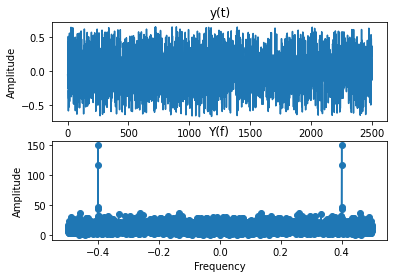

In [6]:
# remove DC spike
y=(signal+noise)-np.mean(signal+noise)
Y = ft(y)                           # Fourier transform
freqs = ftfreqs(len(y),delta_t)
plt.figure()
plt.clf()
plt.subplot(2,1,1)
plt.plot(t,y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('y(t)')
plt.subplot(2,1,2)
plt.plot(freqs,np.abs(Y),'o-')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Y(f)')
plt.show()

It is this difference in behaviour when the DFT is applied, that shows the power of the Fourier Transform to identify period signals, even when the signal is obscured by noise.